# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# to make this notebook's output stable across runs
np.random.seed(42)

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
521,4.518689,38.634483
737,5.284690,33.233497
740,5.292696,34.550609
660,5.030596,34.982985
411,4.182289,43.090662
678,5.077623,29.087582
626,4.925292,39.152161
513,4.483809,41.780157
859,5.853092,36.344797
136,3.049856,54.462176


In [3]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [4]:
len(X)

1000

In [5]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

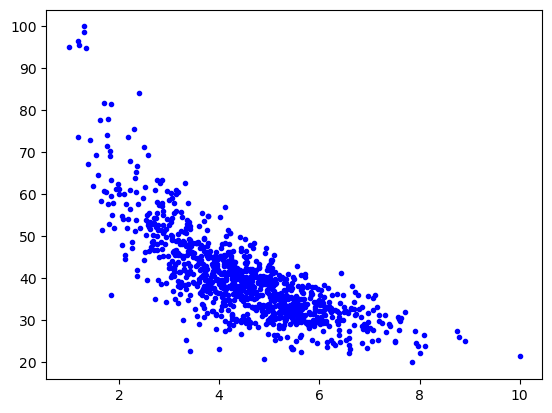

In [6]:
plt.plot(X,y,'b.')

    Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 1000
**************************************************
Numero total de registros en el training set: 900
Tamaño de X_train: (900, 1)
**************************************************
Mumero total de registros en el test dataset: 100
Tamaño del X_test: (100, 1)


    Regresión Lineal.
    Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

c:\Users\genar\.conda\envs\master_AI_ML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


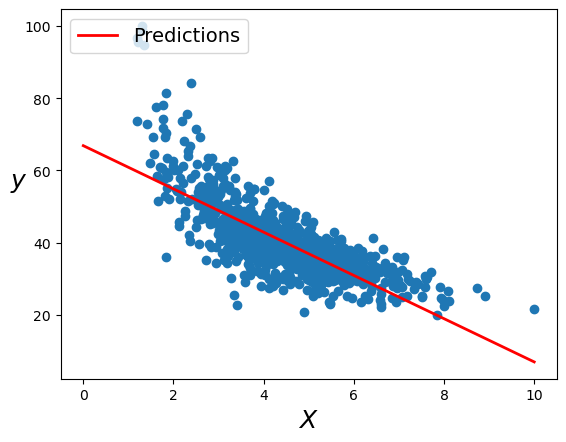

In [8]:
#lineal
#Training model only with training dataset
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

# construct best fit line
X_fit = np.linspace(0, 10, 100)
y_pred_simple = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X_train, y_train)
plt.plot(X_fit, y_pred_simple, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [9]:
 linear_reg.coef_, linear_reg.intercept_

(array([-5.98882699]), 66.83650741226988)

La formula de nuestra ecuacion de regresion lineal:

$\hat{y} = -5.98X + 66.83$

In [10]:
print('Error medio Absoluto (MAE):', mean_absolute_error(y_test, y_pred_simple))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_simple)))
print('r2_score',r2_score(y_test, y_pred_simple))

Error medio Absoluto (MAE): 17.04846730203102
Root Mean Squared Error: 21.45395605907538
r2_score -2.537148714527668


    #POLINOMIAL

c:\Users\genar\.conda\envs\master_AI_ML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


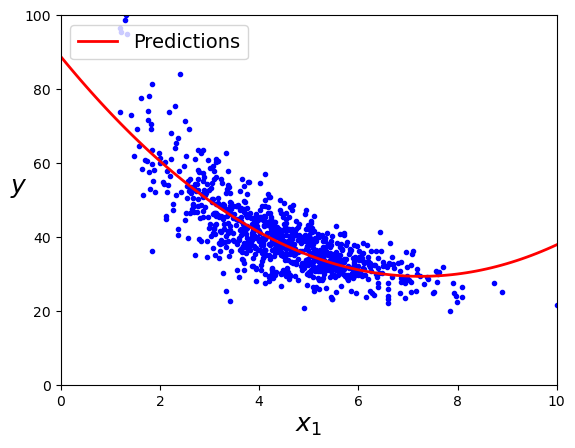

In [11]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)

lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y_train)

X_new=np.linspace(0, 10, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_pred_poly = lin_reg.predict(X_new_poly)


plt.plot(X_train, y_train, "b.")
plt.plot(X_new, y_pred_poly, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 10, 0, 100]);

In [12]:
lin_reg.coef_, lin_reg.intercept_

(array([-16.40638102,   1.13136095]), 88.80179909112499)

La ecuacion de nuestro modelo polinomial quedaria:

$\hat{y} =  -16.40X + 1.13X^2 + 88.80$

In [13]:

print('Error medio Absoluto (MAE):', mean_absolute_error(y_test, y_pred_poly))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_poly)))
print('r2_score',r2_score(y_test, y_pred_poly))

Error medio Absoluto (MAE): 14.983914487426661
Root Mean Squared Error: 20.66253653297425
r2_score -2.2809968605593425


    #RIDGE   

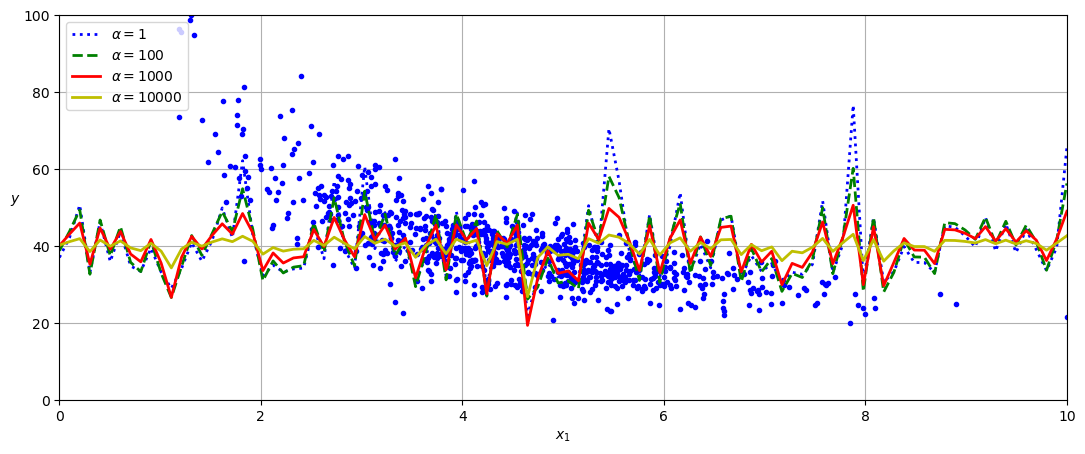

In [14]:
def plot_model(model_class, polynomial, alphas, **model_kwargs):
    
    plt.plot(X_train, y_train, "b.", linewidth=3)
    for alpha, style in zip(alphas, ("b:", "g--", "r-", "y-")):
        if alpha > 0:
            model = model_class(alpha, **model_kwargs)
        else:
            model = LinearRegression()
        if polynomial:
            model = make_pipeline(
                PolynomialFeatures(degree=10, include_bias=False),
                StandardScaler(),
                model)
        model.fit(X_train, y_train)
        y_pred_ridge = model.predict(X_test)
        plt.plot(X_new, y_pred_ridge, style, linewidth=2,
                 label=fr"$\alpha = {alpha}$")
    plt.legend(loc="upper left")
    plt.xlabel("$x_1$")
    plt.axis([0, 10, 0, 100])
    plt.grid()
    return y_pred_ridge



plt.figure(figsize=(13,5))
plot_model(Ridge, polynomial=True, alphas=(1,100, 1000, 10000), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.show()


In [15]:
ridge_reg = Ridge(alpha=0.01)
ridge_reg.fit(X, y)
y_pred_ridge = ridge_reg.predict(X_test)

In [16]:
ridge_reg.intercept_, ridge_reg.coef_  

(67.03889064691876, array([-6.03333448]))

In [17]:
print('Error medio Absoluto (MAE):', mean_absolute_error(y_test, y_pred_ridge))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print('r2_score',r2_score(y_test, y_pred_ridge))

Error medio Absoluto (MAE): 5.007586608781414
Root Mean Squared Error: 7.104245294996175
r2_score 0.612140491671205


    #LASSO REGRESSION   

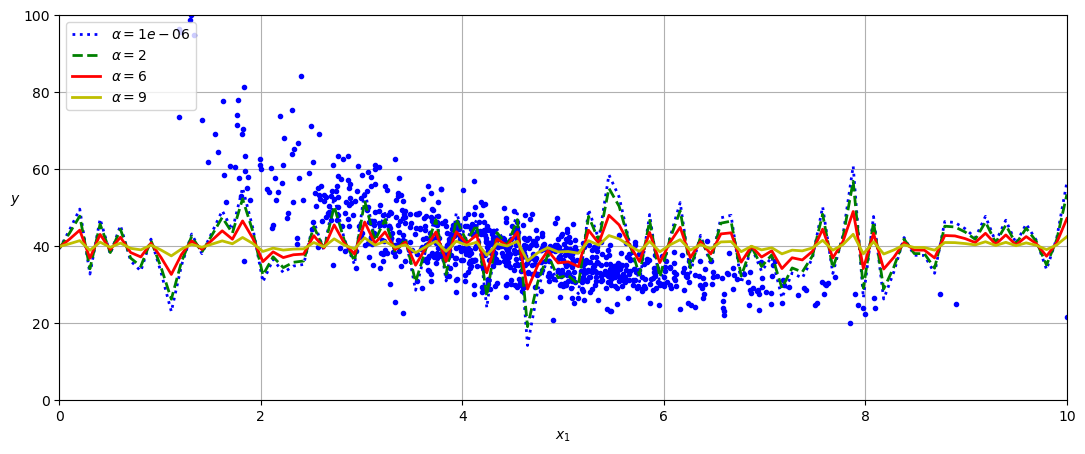

In [18]:
plt.figure(figsize=(13, 5))
plot_model(Lasso, polynomial=False, alphas=(.000001, 2, 6, 9), random_state=42)
plt.ylabel("$y$  ", rotation=0)

plt.show()

In [19]:
lasso_reg = Lasso(alpha=2)
lasso_reg.fit(X_train, y_train)
y_pred_lass = lasso_reg.predict(X_test)

print('Error medio Absoluto (MAE):', mean_absolute_error(y_test, y_pred_lass))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_lass)))
print('r2_score',r2_score(y_test, y_pred_lass))

Error medio Absoluto (MAE): 5.18124326706215
Root Mean Squared Error: 7.4059064684406914
r2_score 0.5785025109885904


In [28]:
lasso_reg.intercept_, lasso_reg.coef_  

(61.76668492487158, array([-4.85558603]))

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [20]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9806,9407150310,20150128T000000,357000.0,4,2.50,1980,9757,2.0,0,0,...,7,1980,0,1995,0,98038,47.3675,-122.019,1610,6147
19855,254000241,20150324T000000,540000.0,3,2.50,2220,5279,2.0,0,0,...,8,2220,0,2006,0,98146,47.5132,-122.387,1610,5297
5870,3416601045,20140623T000000,345000.0,3,1.00,1140,4200,2.0,0,0,...,7,1140,0,1904,0,98144,47.6012,-122.296,1510,4000
3369,9407101380,20141230T000000,189000.0,3,2.00,1460,11481,1.0,0,0,...,7,1170,290,1995,0,98045,47.4493,-121.777,1540,9680
13685,3123059107,20140520T000000,555000.0,3,2.50,3050,158558,1.0,0,0,...,9,3050,0,1987,0,98055,47.4326,-122.208,2960,31050
11551,1938000140,20150428T000000,810000.0,4,2.00,2920,10424,1.0,0,0,...,8,1520,1400,1964,0,98005,47.5876,-122.172,2360,10696
283,7202360350,20140630T000000,780000.0,4,2.50,3500,7048,2.0,0,0,...,9,3500,0,2005,0,98053,47.6811,-122.025,3920,7864
3894,2085200261,20150218T000000,422500.0,3,2.00,1960,6450,1.0,0,0,...,7,1000,960,1977,0,98038,47.3972,-122.029,1660,20720
3931,3592500985,20150504T000000,880000.0,4,2.50,2350,4675,2.0,0,0,...,9,2150,200,1923,0,98112,47.6344,-122.305,2240,3848
19722,9161100075,20150318T000000,673000.0,4,2.25,2580,2875,2.0,0,0,...,9,2580,0,2015,0,98116,47.5674,-122.392,1290,5750


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [22]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [23]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


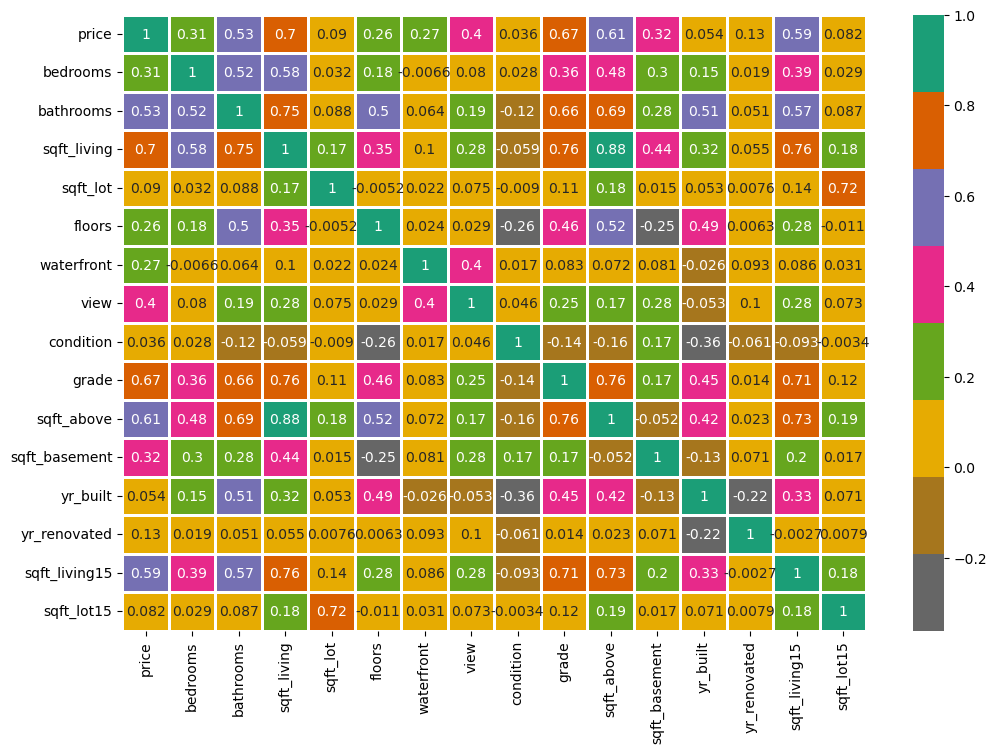

In [24]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [25]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


In [27]:
#tu codigo aquí